In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_titles.csv")

### Task.1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [3]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [4]:
# No there is no duplicate record in this dataset.

### Task.2) Is there any Null Value present in any column ? Show with Heat-map.

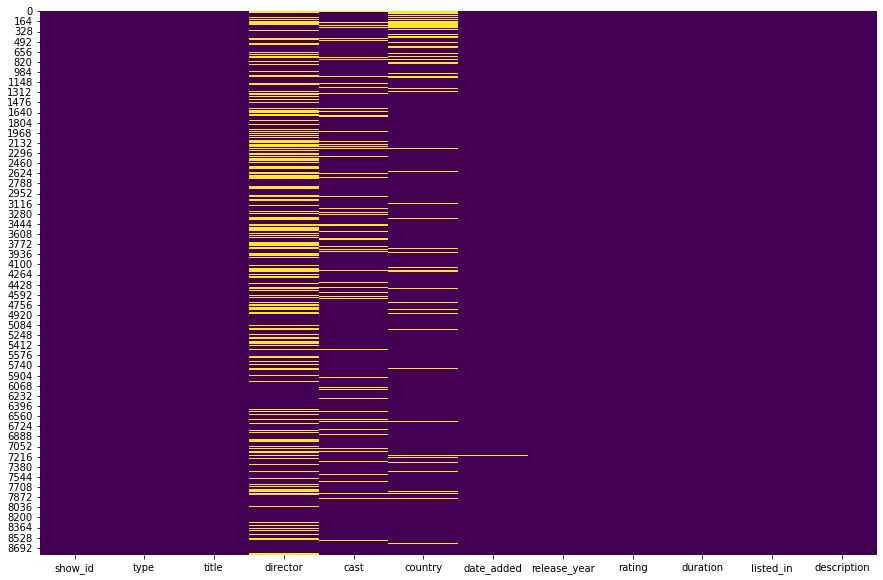

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

### Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [6]:
df[df["title"] == "House of Cards"].loc[:,["show_id","director"]]

,show_id,director
1059,s1060,NaN


### Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [158]:
data = df.groupby(["year","type"])["title"].count().reset_index(name="count")
data

,year,type,count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,5
8,2014.0,Movie,19
9,2014.0,TV Show,5


In [159]:
pivot_data = data.pivot(index="year",columns="type",values="count")
pivot_data["total"] = pivot_data["Movie"] + pivot_data["TV Show"]
pivot_data

type,Movie,TV Show,total
year,,,
2008.0,1.0,1.0,2.0
2009.0,2.0,NaN,NaN
2010.0,1.0,NaN,NaN
2011.0,13.0,NaN,NaN
2012.0,3.0,NaN,NaN
2013.0,6.0,5.0,11.0
2014.0,19.0,5.0,24.0
2015.0,56.0,26.0,82.0
2016.0,253.0,176.0,429.0


In [151]:
# In Year 2019 highest number of TV Show and Movie were released.
pivot_data["total"].idxmax()

2019.0

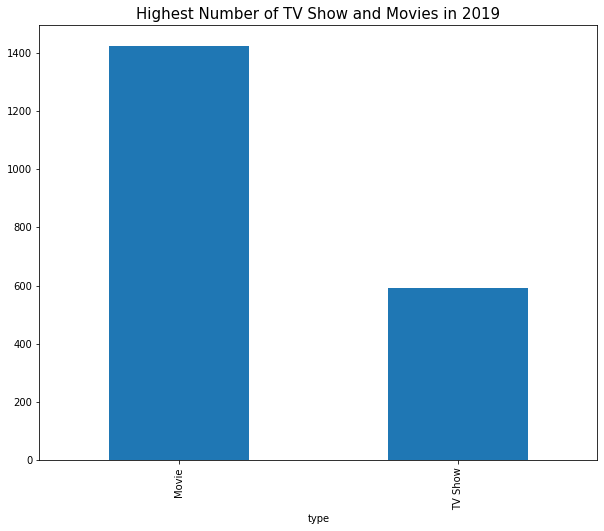

In [168]:
plt.figure(figsize=(10,8))
pivot_data.loc[pivot_data["total"].idxmax()][["Movie","TV Show"]].plot(kind="bar")
plt.title("Highest Number of TV Show and Movies in 2019",fontdict={"fontsize":15})
plt.show()

### Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

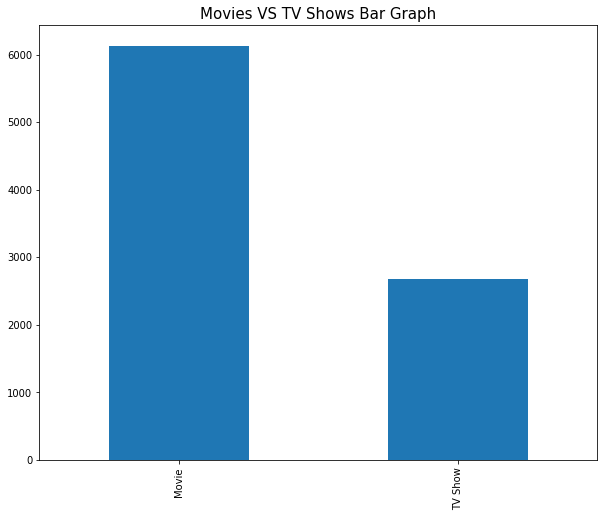

In [169]:
plt.figure(figsize=(10,8))
df["type"].value_counts().plot(kind="bar")
plt.title("Movies VS TV Shows Bar Graph",fontdict={"fontsize":15})
plt.show()

### Q. 4) Show all the Movies that were released in year 2000.

In [170]:
df[df["release_year"] == 2000].loc[:,["title"]]

,title
180,The Nutty Professor II: The Klumps
350,Space Cowboys
359,The Original Kings of Comedy
566,Charlie's Angels
593,Snow Day
779,Battlefield Earth
952,The Whole Nine Yards
2173,Moesha
3472,Rugrats in Paris: The Movie
4545,Monty Python: Before the Flying Circus


### Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [171]:
df[(df["country"] == "India") & (df["type"] == "TV Show")].loc[:,["title"]]

,title
4,Kota Factory
39,Chhota Bheem
50,Dharmakshetra
66,Raja Rasoi Aur Anya Kahaniyan
69,Stories by Rabindranath Tagore
...,...
8173,Thackeray
8235,The Calling
8321,The Golden Years with Javed Akhtar
8349,The House That Made Me


### Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [172]:
df.groupby("director")["title"].count().sort_values(ascending=False).iloc[:11]

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Don Michael Paul          10
Name: title, dtype: int64

### Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [173]:
df[( (df["listed_in"] == "Comedies") & (df["type"] == "Movie") ) | (df["country"] == "United Kingdom")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...,2021.0
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,2021.0
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6,Kids' TV,"In a place called Numberland, math adds up to ...",2021.0
72,s73,TV Show,Jack Whitehall: Travels with My Father,NaN,"Jack Whitehall, Michael Whitehall",United Kingdom,"September 14, 2021",2021,TV-MA,5,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,NaN,Dougray Scott,United Kingdom,"March 31, 2017",2015,TV-PG,1,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...,2017.0
8741,s8742,TV Show,Wild Arabia,NaN,Alexander Siddig,United Kingdom,"March 31, 2017",2013,TV-PG,1,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...,2017.0
8744,s8745,Movie,Williams,Morgan Matthews,NaN,United Kingdom,"November 4, 2017",2017,TV-MA,105,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...,2017.0
8758,s8759,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019.0


### Q. 8) In how many movies/shows, Tom Cruise was cast ?

In [174]:
count = 0
for i in df["cast"]:
    if "Tom Cruise" in str(i):
        count += 1
        # lst.append(df[df["cast"] == i].index[0])

In [176]:
# Tom Cruise was casted in 2 movies/shows.
count

2

### Q. 9) What are the different Ratings defined by Netflix ?

In [16]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

### Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?

In [17]:
len(df[(df["type"] == "Movie") & (df["rating"] == "TV-14") & (df["country"] == "Canada")])

13

### Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

In [18]:
len(df[(df["type"] == "TV Show") & (df["rating"] == "R") & (df["release_year"] > 2018)])

0

### Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

In [19]:
df["duration"] = df["duration"].str.replace("min","").str.replace("Seasons","").str.replace("Season","").astype(float)

In [20]:
# df[df["type"] == "Movie"]["duration"].isna().sum()
# 3 Null value for movie type duration

In [21]:
# df[df["type"] == "TV Show"]["duration"].isna().sum()
# 0 Null value for tv show duration.

In [27]:
df["duration"].fillna(df["duration"].mean().round(0),inplace=True)

In [32]:
df["duration"] = df["duration"].astype(int)

In [37]:
df[df["type"] == "TV Show"]["duration"].max()
# 17 Season max for TV Show

17

In [38]:
df[df["type"] == "Movie"]["duration"].max()
# 312 Min max for Movies

312

### Q. 11) Which individual country has the Highest No. of TV Shows ?

In [49]:
df[df["type"] == "TV Show"].groupby("country")["title"].count().sort_values(ascending=False).reset_index()["country"][0]

'United States'

### Q. 12) How can we sort the dataset by Year ?

In [58]:
df["year"] = pd.to_datetime(df["date_added"]).dt.year

In [59]:
df.sort_values("year")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",2006,TV-MA,81,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0
6611,s6612,TV Show,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008.0
5956,s5957,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,TV-MA,104,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0
5955,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-MA,29,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0
7370,s7371,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN


### Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [62]:
df[( (df["type"] == "Movie") & (df["listed_in"] == "Dramas") ) | ( (df["type"] == "TV Show") & (df["listed_in"] == "Kids TV") )]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
112,s113,Movie,Worth,Sara Colangelo,"Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...",NaN,"September 3, 2021",2021,PG-13,119,Dramas,"In the wake of the Sept. 11 attacks, a lawyer ...",2021.0
129,s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States","September 1, 2021",2005,PG-13,108,Dramas,A grieving widow and her daughter move in with...,2021.0
142,s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States","September 1, 2021",2007,PG-13,124,Dramas,While her at-risk students are reading classic...,2021.0
162,s163,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong","September 1, 2021",2017,PG-13,118,Dramas,"This biopic of Thurgood Marshall, the first Bl...",2021.0
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","August 1, 2021",2002,PG-13,142,Dramas,An FBI agent makes it his mission to put cunni...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8674,s8675,Movie,Viceroy's House,Gurinder Chadha,"Hugh Bonneville, Gillian Anderson, Manish Daya...","United Kingdom, India, Sweden","December 12, 2017",2017,NR,106,Dramas,As viceroy Lord Mountbatten arrives in Delhi t...,2017.0
8675,s8676,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,"July 24, 2017",2015,PG-13,110,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join...",2017.0
8685,s8686,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",2018,TV-MA,99,Dramas,A young man in foster care finds his voice in ...,2019.0
8691,s8692,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",2016,R,109,Dramas,An unhappy father and lawyer quits his suburba...,2019.0
